In [2]:
import pandas as pd
import numpy as np
from infomap import Infomap
import networkx as nx
import matplotlib.pyplot as plt
import time


Could not load sparse_dot_mkl. Will use scipy.sparse for matrix products.


# Airports

In [3]:
times = np.logspace(-3,4,num=20)[2:-2]
fracs = np.arange(5,96,5)

In [26]:
graph_name = 'flights'

t = times[0]

f = fracs[0]

edge_list = pd.read_csv("replication Infomap/flights/airports_edgelist")
edge_list = edge_list.drop("Unnamed: 0",axis=1)
edge_list

,source,target,weight
0,730,719,2
1,737,715,2
2,737,709,1
3,737,688,1
4,737,718,2
...,...,...,...
5782,1611,1612,1
5783,1382,1626,1
5784,1626,1382,1
5785,4091,1386,1


In [27]:
linear_fwd = df_res['forward_nodes']

linear_bck = df_res['backward_nodes']

N = 349

nodes_in_both = np.intersect1d(np.unique(linear_fwd),np.unique(linear_bck))
nodes_only_fwd = np.setdiff1d(np.unique(linear_fwd),nodes_in_both)
nodes_only_bckwd = np.setdiff1d(np.unique(linear_bck),nodes_in_both)

In [28]:
f=fracs[12]
graph_name = 'flights'

In [29]:
G_w = nx.from_pandas_edgelist(edge_list,edge_attr=True,create_using=nx.DiGraph())

In [30]:
im = Infomap(silent=True,two_level=True,num_trials=50,regularized=True,regularization_strength=0.1)
im.add_networkx_graph(G_w)
im.run()

nodelist = G_w.nodes
modules_gt = dict(im.modules)
infomap_ground_truth_labs = [modules_gt[node] for node in nodelist]


In [31]:
np.save("replication Infomap//flights/info_map_flights/ground_truth_infomap",np.array(infomap_ground_truth_labs))

In [32]:
fracs = np.arange(5,96,5)

for run in range(len(fracs)):
    frac = fracs[run]
    rand_edges = np.load("replication Infomap/flights/airports_w_list_of_removed_edges_perc_%s.npy"%frac)
    g = G_w.copy()
    g.remove_edges_from(rand_edges)
    
    im = Infomap(silent=True,two_level=True,num_trials=50,regularized=True,regularization_strength=0.1)
    im.add_networkx_graph(g)
    im.run()

    nodelist = g.nodes
    modules_recon = dict(im.modules)
    infomap_recon = [modules_recon[node] for node in nodelist]
    np.save("replication Infomap/flights/info_map_flights/comm_labs_infomap_per_%s_0.1"%frac,np.array(infomap_recon))


In [33]:
n_c_info = np.zeros(12)
for run in range(12):
    frac=fracs[run]
    comms = np.load("replication Infomap/flights/info_map_flights/comm_labs_infomap_per_%s_0.1.npy"%frac)
    n_c_info[run] = np.max(comms)


In [34]:
infomap_ground_truth_labs = np.load("replication Infomap/flights/info_map_flights/ground_truth_infomap.npy")
labels = np.unique(infomap_ground_truth_labs)
list_comms_GT = []
for i in labels:
    idxs = np.where(infomap_ground_truth_labs==i)[0]
    list_comms_GT.append(list(idxs))


In [35]:
from FlowStability import norm_mutual_information

NMI_info_infoGT = np.zeros(12)

for run in range(12):
    comms = np.load("replication Infomap/flights/info_map_flights/comm_labs_infomap_per_%s_0.1.npy"%fracs[run])

    labels = np.unique(comms)
    list_comms = []
    for i in labels:
        idxs = np.where(comms==i)[0]
        list_comms.append(list(idxs))
    
    
    NMI_info_infoGT[run] = norm_mutual_information([set(k) for k in list_comms_GT],[set(k) for k in list_comms])
    



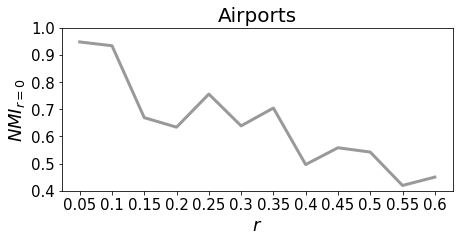

In [36]:
fig=plt.figure(figsize=(7,3))

plt.yticks(fontsize=15)
plt.plot(NMI_info_infoGT,linewidth=3,alpha=0.8,color='grey')
plt.xticks(ticks=np.arange(0,len(fracs[:12]),1),labels=fracs[:12]/100,fontsize=15)
plt.title('Airports',fontsize=20)
plt.xlabel('$r$',fontsize=18)
plt.ylabel('$NMI_{r=0}$',fontsize=18)
plt.ylim(0.4,1)
# plt.savefig("confronto_infomap_regGroudTruth_delta_NMI_airports.png")
# plt.savefig("confronto_infomap_regGroudTruth_delta_NMI_airports.svg")
plt.show()

In [37]:
n_c = np.zeros(len(fracs))
for run in range(len(fracs)):
    frac=fracs[run]
    comms = np.load("replication Infomap/flights/info_map_flights/comm_labs_infomap_per_%s_0.1.npy"%frac)
    n_c[run] = np.max(comms)

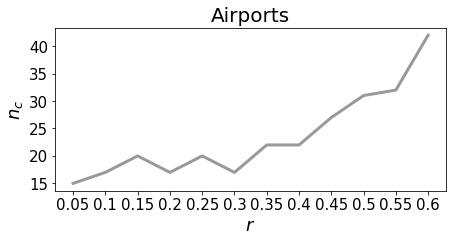

In [38]:
fig=plt.figure(figsize=(7,3))
plt.plot(n_c_info,linewidth=3,alpha=0.8,color='grey')
plt.xticks(ticks=np.arange(0,len(fracs[:12]),1),labels=fracs[:12]/100,fontsize=15)
plt.yticks(fontsize=15)
plt.title('Airports',fontsize=20)
plt.xlabel('$r$',fontsize=18)
plt.ylabel('$n_c$',fontsize=18)


plt.show()

# Cora

In [39]:
edgelist = pd.read_csv("replication Infomap/cora/cora/cora.cites", sep='\t', header=None, names=["target", "source"])
edgelist["label"] = "cites"

In [40]:
Gnx = nx.from_pandas_edgelist(edgelist, edge_attr="label",create_using=nx.DiGraph())


In [41]:
im = Infomap(silent=True,two_level=True,num_trials=50,regularized=True,regularization_strength=0.4)
im.add_networkx_graph(Gnx)
im.run()

nodelist = Gnx.nodes
modules_gt = dict(im.modules)
infomap_ground_truth_labs = [modules_gt[node] for node in nodelist]

In [42]:
np.save("replication Infomap/cora/infomap_cora/ground_truth_infomap_cora",np.array(infomap_ground_truth_labs))

In [43]:
fracs = np.arange(5,96,5)

for run in range(len(fracs)):
    frac = fracs[run]
    rand_edges = np.load("flow_stab_empirical/cora/citations_w_list_of_removed_edges_perc_%s.npy"%frac)
    g = Gnx.copy()
    g.remove_edges_from(rand_edges)
    
    im = Infomap(silent=True,two_level=True,num_trials=50,regularized=True,regularization_strength=0.3)
    im.add_networkx_graph(g)
    im.run()

    nodelist = g.nodes
    modules_recon = dict(im.modules)
    infomap_recon = [modules_recon[node] for node in nodelist]
    np.save("replication Infomap/cora/infomap_cora//comm_labs_infomap_cora_per_%s_0.7"%frac,np.array(infomap_recon))


In [44]:
n_c_info = np.zeros(12)

for run in range(12):
    frac=fracs[run]
    comms = np.load("replication Infomap/cora/infomap_cora//comm_labs_infomap_cora_per_%s_0.3.npy"%frac)
    n_c_info[run] = np.max(comms)


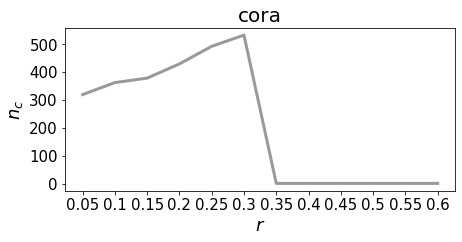

In [45]:
fig=plt.figure(figsize=(7,3))
plt.plot(n_c_info,linewidth=3,alpha=0.8,color='grey')
plt.xticks(ticks=np.arange(0,len(fracs[:12]),1),labels=fracs[:12]/100,fontsize=15)
plt.yticks(fontsize=15)
plt.title('cora',fontsize=20)
plt.xlabel('$r$',fontsize=18)
plt.ylabel('$n_c$',fontsize=18)


plt.show()

In [46]:
comms = np.load("replication Infomap/flights/info_map_flights/comm_labs_infomap_per_%s_0.25.npy"%5)

labels = np.unique(comms)
list_comms = []
for i in labels:
    idxs = np.where(comms==i)[0]
    list_comms.append(list(idxs))
    
infomap_ground_truth_labs = np.load("replication Infomap/cora/infomap_cora/ground_truth_infomap_cora.npy")
labels = np.unique(infomap_ground_truth_labs)
list_comms_GT = []
for i in labels:
    idxs = np.where(infomap_ground_truth_labs==i)[0]
    list_comms_GT.append(list(idxs))

In [47]:
from FlowStability import norm_mutual_information

NMI_info_infoGT = np.zeros(12)

for run in range(12):
    comms = np.load("replication Infomap/cora/infomap_cora//comm_labs_infomap_cora_per_%s_0.3.npy"%fracs[run])

    labels = np.unique(comms)
    list_comms = []
    for i in labels:
        idxs = np.where(comms==i)[0]
        list_comms.append(list(idxs))
    
    
    NMI_info_infoGT[run] = norm_mutual_information([set(k) for k in list_comms_GT],[set(k) for k in list_comms])
    



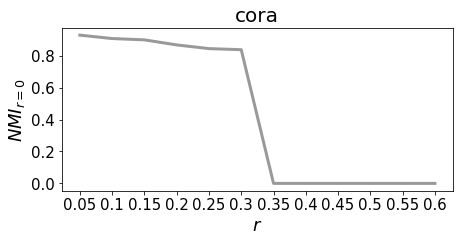

In [48]:
fig=plt.figure(figsize=(7,3))

plt.yticks(fontsize=15)
plt.plot(NMI_info_infoGT,linewidth=3,alpha=0.8,color='grey')
plt.xticks(ticks=np.arange(0,len(fracs[:12]),1),labels=fracs[:12]/100,fontsize=15)
plt.title('cora',fontsize=20)
plt.xlabel('$r$',fontsize=18)
plt.ylabel('$NMI_{r=0}$',fontsize=18)

plt.show()

# Cit HEP-TH

In [49]:
data = pd.read_csv('replication Infomap/cit_Hep/cit-HepTh.txt', sep="\t", names=['FromNodeId','ToNodeId'])
data=data.drop(0,axis=0)
data

/tmp/ipykernel_18967/3916771336.py:1: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('replication Infomap/cit_Hep/cit-HepTh.txt', sep="\t", names=['FromNodeId','ToNodeId'])


,FromNodeId,ToNodeId
1,1001,9304045
2,1001,9308122
3,1001,9309097
4,1001,9311042
5,1001,9401139
...,...,...
352803,9912286,9805150
352804,9912286,9806074
352805,9912286,9808140
352806,9912286,9810068


In [50]:
edge_list = pd.DataFrame()
edge_list['source'] = data['FromNodeId']
edge_list['target'] = data['ToNodeId']

In [51]:
#need smaller network for Delta FS
edge_list_new = edge_list.loc[:55186]
G_w = nx.from_pandas_edgelist(edge_list_new,create_using=nx.DiGraph())
G_w = G_w.subgraph(list(G_w.nodes())[:4378]).copy()


In [52]:
im = Infomap(silent=True,two_level=True,num_trials=50,regularized=True,regularization_strength=0.1)
im.add_networkx_graph(G_w)
im.run()

nodelist = G_w.nodes
modules_gt = dict(im.modules)
infomap_ground_truth_labs = [modules_gt[node] for node in range(len(nodelist))]

In [53]:
np.save("replication Infomap/cit_Hep/info_map_cithep/ground_truth_infomap_cithep",np.array(infomap_ground_truth_labs))

In [58]:
fracs = np.arange(5,96,5)

for run in range(len(fracs)):
    frac = fracs[run]
    rand_edges = np.load("replication Infomap/cit_Hep/citations_w_list_of_removed_edges_perc_%s.npy"%frac)
    g = G_w.copy()
    g.remove_edges_from(rand_edges)
    
    im = Infomap(silent=True,two_level=True,num_trials=50,regularized=True,regularization_strength=0.1)
    im.add_networkx_graph(g)
    im.run()

    nodelist = g.nodes
    modules_recon = dict(im.modules)
    infomap_recon = [modules_recon[node] for node in range(len(nodelist))]
    np.save("replication Infomap/cit_Hep/info_map_cithep/comm_labs_infomap_cithep_per_%s_0.1"%frac,np.array(infomap_recon))


In [59]:
infomap_ground_truth_labs = np.load("replication Infomap/cit_Hep/info_map_cithep/ground_truth_infomap_cithep.npy")
labels = np.unique(infomap_ground_truth_labs)
list_comms_GT = []
for i in labels:
    idxs = np.where(infomap_ground_truth_labs==i)[0]
    list_comms_GT.append(list(idxs))


In [60]:
n_c_info = np.zeros(12)
for run in range(12):
    frac=fracs[run]
    comms = np.load("replication Infomap/cit_Hep/info_map_cithep/comm_labs_infomap_cithep_per_%s_0.1.npy"%frac)
    n_c_info[run] = np.max(comms)


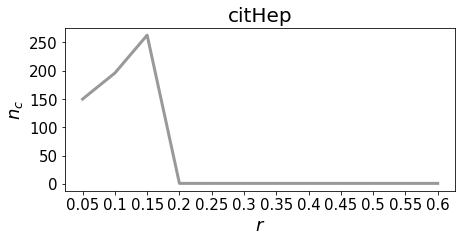

In [61]:
fig=plt.figure(figsize=(7,3))
plt.plot(n_c_info,linewidth=3,alpha=0.8,color='grey')
plt.xticks(ticks=np.arange(0,len(fracs[:12]),1),labels=fracs[:12]/100,fontsize=15)
plt.yticks(fontsize=15)
plt.title('citHep',fontsize=20)
plt.xlabel('$r$',fontsize=18)
plt.ylabel('$n_c$',fontsize=18)
# plt.savefig("confronto_infomap_delta_nc_citHep.png")
# plt.savefig("confronto_infomap_delta_nc_citHep.svg")

plt.show()

In [62]:
from FlowStability import norm_mutual_information

NMI_info_infoGT = np.zeros(12)

for run in range(12):
    comms = np.load("replication Infomap/cit_Hep/info_map_cithep/comm_labs_infomap_cithep_per_%s_0.1.npy"%fracs[run])

    labels = np.unique(comms)
    list_comms = []
    for i in labels:
        idxs = np.where(comms==i)[0]
        list_comms.append(list(idxs))
    
    
    NMI_info_infoGT[run] = norm_mutual_information([set(k) for k in list_comms_GT],[set(k) for k in list_comms])
    



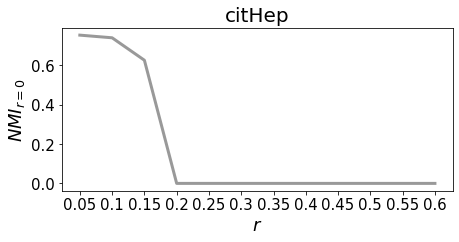

In [63]:
fig=plt.figure(figsize=(7,3))

plt.yticks(fontsize=15)
plt.plot(NMI_info_infoGT,linewidth=3,alpha=0.8,color='grey')
plt.xticks(ticks=np.arange(0,len(fracs[:12]),1),labels=fracs[:12]/100,fontsize=15)
plt.title('citHep',fontsize=20)
plt.xlabel('$r$',fontsize=18)
plt.ylabel('$NMI_{r=0}$',fontsize=18)

plt.show()